### Notebook to plot longwave feedback and associated variables from WRF model output.

James Ruppert  
jruppert@ou.edu  
2/15/24

In [37]:
import numpy as np
import matplotlib
from matplotlib import ticker
import matplotlib.pyplot as plt
import sys
from thermo_functions import *
from precip_class import *
import seaborn as sns
# import xarray as xr
from memory_usage import *
from read_functions import *

### Main settings

In [38]:
# #### Main settings

storm = 'haiyan'
# storm = 'maria'

# main = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/wrfenkf/"
main = "/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/"
datdir2 = 'post/d02/'

# Set to true to do sensitivty test comparisons
# Else: analysis of CTL only
do_tests=True
# do_tests=False
t1_test=12 # n time steps to sample for tests

figdir = "/home/jamesrup/figures/tc/ens/boxplot/"

time_neglect=12 # time steps from start to neglect

# Number of sample time steps
nt=200 # will be chopped down to max available
# nt=48
# nt=12

# Members
nmem = 10 # number of ensemble members (1-5 have NCRF)
# nmem = 3
enstag = str(nmem)

In [39]:
# Ensemble member info
memb0=1 # Starting member to read
memb_nums=np.arange(memb0,nmem+memb0,1)
memb_nums_str=memb_nums.astype(str)
nustr = np.char.zfill(memb_nums_str, 2)
memb_all=np.char.add('memb_',nustr)

# Get dimensions
test_str='ctl'
datdir = main+storm+'/'+memb_all[0]+'/'+test_str+'/'+datdir2
nt_data, nz, nx1, nx2, pres = get_file_dims(datdir)
dp = (pres[1]-pres[0])*1e2 # Pa
nt=np.min([nt,nt_data-time_neglect])
if do_tests:
    nt=t1_test
nx1-=80*2
nx2-=80*2

In [40]:
# Tests to read and compare
if storm == 'haiyan':
    tests = ['ctl','ncrf36h','STRATANVIL_ON','STRATANVIL_OFF','STRAT_OFF']
    tests_str = ['CTL','NCRF','STRATANVON','STRATANVOFF','STRATOFF']
    tests = ['ctl','ncrf36h','STRATANVIL_ON']
    tests_str = ['CTL','NCRF','STRATANVON']
    # tests = ['crfon','ncrf']
elif storm == 'maria':
    # tests = ['ctl','ncrf36h']
    tests = ['ctl','ncrf48h']
    tests_str = ['CTL','NCRF']

if not do_tests:
    tests=[tests[0]]
    tests_str=[tests_str[0]]
ntest = len(tests)

### Read loop

In [41]:
# Main read loops for 3D (dependent) variables

# Arrays to save variables
dims = (ntest, nmem, nt, nx1, nx2)
pclass_all = np.ma.zeros(dims)
cwv_1hr    = np.ma.zeros(dims)
lwacre_1hr = np.ma.zeros(dims)
qrain_1hr  = np.ma.zeros(dims)
rain_1hr   = np.ma.zeros(dims)

for itest in range(ntest):
# for itest in range(1):

    test_str = tests[itest]
    print()
    print('Running test: ',test_str)

    # t0=time_neglect # neglect the first 12 time steps
    # t1=t0+nt
    if test_str == 'ctl':
        t0=time_neglect
        t1=nt+t0
        if do_tests:
            t0=36
            # t1=t0+49
            # Control test time sample
            t1=t0+t1_test
    else:
        t0=0
        # t1=49 # max
        # Control test time sample
        t1=t1_test

    # Loop over ensemble members
    for imemb in range(nmem):
    # for imemb in range(1):

        print('Running imemb: ',memb_all[imemb])

        datdir = main+storm+'/'+memb_all[imemb]+'/'+test_str+'/'+datdir2
        print(datdir)

        # Stratiform ID
        q_int = read_qcloud(datdir,t0,t1,mask=True,drop=True) # mm
        pclass = precip_class(q_int)

        # CWV
        varname='PW'
        cwv = var_read_2d(datdir,varname,t0,t1,mask=True,drop=True) # mm
        # ddtq = np.gradient(lwnet, axis=0) # mm/hr

        # Rain rate
        varname = 'rainrate'
        rain = var_read_2d(datdir,varname,t0,t1,mask=True,drop=True) # mm/d

        # LWACRE
        lwacre = read_lwacre(datdir,t0,t1,mask=True,drop=True) # W/m2

        # Save variables for each ens member
        pclass_all[itest,imemb,:,:,:] = pclass
        rain_1hr[itest,imemb,:,:,:]   = rain
        qrain_1hr[itest,imemb,:,:,:]  = q_int[1]
        cwv_1hr[itest,imemb,:,:,:]    = cwv
        lwacre_1hr[itest,imemb,:,:,:] = lwacre


Running test:  ctl
Running imemb:  memb_01
/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_01/ctl/post/d02/
Running imemb:  memb_02
/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_02/ctl/post/d02/
Running imemb:  memb_03
/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_03/ctl/post/d02/
Running imemb:  memb_04
/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_04/ctl/post/d02/
Running imemb:  memb_05
/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_05/ctl/post/d02/
Running imemb:  memb_06
/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_06/ctl/post/d02/
Running imemb:  memb_07
/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_07/ctl/post/d02/
Running imemb:  memb_08
/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_08/ctl/post/d02/
Running imemb:  memb_09
/ourdisk/hpc/radclouds/auto_

### Analysis code

In [166]:
# Smoothing function
# def time_smooth_var(var, nwindow):
#     data_xr = xr.DataArray(var,
#                             coords={'test':np.arange(ntest), 'memb':memb_nums, 'time':np.arange(nt),
#                             'y':np.arange(nx1), 'x':np.arange(nx2)},
#                             dims=['test','memb','time','y','x'])
#     data_smooth = data_xr.rolling(time=nwindow, center=True).mean()
#     return data_smooth.to_masked_array()

In [167]:
# # ### Run binning

# def get_kstrat_cells(var_in, strat):
#     var_indexed = []
#     nstrat=6
#     for kstrat in range(nstrat):
#         indices = (strat == kstrat).nonzero()
#         indexed_var = var_in[indices[0],indices[1],indices[2],indices[3]]
#         var_indexed.append(indexed_var)
#     return var_indexed

In [168]:
# qrain_indexed_1hr    = get_kstrat_cells(qrain_1hr, strat_all)
# cwv_indexed_1hr      = get_kstrat_cells(cwv_1hr, strat_all)
# lwacre_indexed_1hr   = get_kstrat_cells(lwacre_1hr, strat_all)
# # vmfu_indexed_1hr     = get_kstrat_cells(vmfu_1hr, strat_all)
# # condh_indexed_1hr    = get_kstrat_cells(condh_1hr, strat_all)
# lwfeedb1_indexed_1hr = get_kstrat_cells(np.absolute(lwacre_1hr)/qrain_1hr, strat_all)
# # lwfeedb2_indexed_1hr = get_kstrat_cells(np.absolute(lwacre_1hr)/vmfu_1hr , strat_all)
# # lwfeedb3_indexed_1hr = get_kstrat_cells(np.absolute(lwacre_1hr)/condh_1hr, strat_all)
# # lwfeedb1_indexed_1hr = get_kstrat_cells(lwacre_1hr/qrain_1hr, strat_all)
# # lwfeedb2_indexed_1hr = get_kstrat_cells(lwacre_1hr/vmfu_1hr , strat_all)
# # lwfeedb3_indexed_1hr = get_kstrat_cells(lwacre_1hr/condh_1hr, strat_all)

In [169]:
# # Mask out where values go infinite
# for iclass in range(6):
#     # lwfeedb1_indexed_1hr[ivar] = np.ma.masked_where(np.bitwise_or((lwacre_indexed_1hr[ivar] == 0), (qrain_indexed_1hr[ivar] == 0)),
#     #     lwfeedb1_indexed_1hr[ivar], copy=False)
#     lwfeedb1_indexed_1hr[iclass] = np.ma.masked_where((qrain_indexed_1hr[iclass] == 0), lwfeedb1_indexed_1hr[iclass], copy=False)

In [42]:
# Mean class areas
# npts = nmem*nt*nx1*nx2
npts = nx1*nx2
nclass=6
# area_frac = np.zeros((nclass,nmem,nt))
area_frac = np.zeros((nclass,ntest,nmem,nt))
for iclass in range(nclass):
    for itest in range(ntest):
        for imemb in range(nmem):
            for it in range(nt):
                ind = (pclass_all[itest,imemb,it] == iclass).nonzero()
                area_frac[iclass,itest,imemb,it] = ind[0].size/npts

In [43]:
# ### PClass Masking

# Averages across x,y, yielding a variable f(nclass, nmem, nt)

def kclass_masking(var_in, pclass):
    nclass=6
    shape=var_in.shape
    # var_out = np.ma.zeros((nclass,shape[0],shape[1]))
    var_out = np.ma.zeros((nclass,shape[0],shape[1],shape[2]))
    for iclass in range(nclass):
        var_tmp = np.ma.masked_where((pclass != iclass), var_in, copy=True)
        # var_out[iclass] = np.ma.mean(var_tmp, axis=(2,3))
        var_out[iclass] = np.ma.mean(var_tmp, axis=(3,4))
    return var_out

In [44]:
qrain_masked = kclass_masking(qrain_1hr, pclass_all)
rain_masked = kclass_masking(rain_1hr, pclass_all)
cwv_masked = kclass_masking(cwv_1hr, pclass_all)
lwacre_masked = kclass_masking(lwacre_1hr, pclass_all)

In [46]:
lwfeedback1 = lwacre_masked / qrain_masked
lwfeedback2 = lwacre_masked / rain_masked

### Plotting functions

In [48]:
# ---
# ### Plotting routines

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 11}

matplotlib.rc('font', **font)

In [80]:
# Global boxplot settings

def create_boxplot(invar, test_str, title_tag, fig_tag, units, yscale='linear'):

    c_name = ['Non-precip', 'Deep\nConvective', 'Congestus', 'Shallow', 'Stratiform', 'Anvil']
    cmap = ['white', 'teal', 'plum', 'darkorange', 'gold', 'cornflowerblue']
    # c_name = ['Deep\nConvective', 'Congestus', 'Shallow\nConvective', 'Stratiform', 'Anvil']
    # cmap = ['teal', 'plum', 'darkorange', 'gold', 'cornflowerblue']
    sns.set_palette(cmap)

    fig = plt.figure(figsize=(5.5,4),dpi=300)
    # fig.set_facecolor('white')
    ax = fig.subplots(nrows=1, ncols=1)
    sns.boxplot([invar[0], invar[1], invar[2], invar[3], invar[4], invar[5]],
    # sns.boxplot([invar[1], invar[2], invar[3], invar[4], invar[5]],
                width=0.7, showmeans=True, #log_scale=log_scale,
                meanprops={"marker":"o", "markerfacecolor":"white", 
                "markeredgecolor":"black", "markersize":"6"})

    ax.set_yscale(yscale)
    ax.set_xticklabels(c_name)
    plt.ylabel(units)#, weight='bold')
    plt.title("Class-averaged "+title_tag)#, weight='bold')
    time_tag='_'+str(nt)+'hrs'
    # time_tag=''
    plt.savefig(figdir+fig_tag+'_'+test_str+time_tag+'.png',dpi=200, facecolor='white', bbox_inches='tight', pad_inches=0.2)

In [81]:
def create_boxplot_noclear(invar, test_str, title_tag, fig_tag, units, yscale='linear'):

    # c_name = ['Non-precip', 'Deep\nConvective', 'Congestus', 'Shallow\nConvective', 'Stratiform', 'Anvil']
    # cmap = ['white', 'teal', 'plum', 'darkorange', 'gold', 'cornflowerblue']
    c_name = ['Deep\nConvective', 'Congestus', 'Shallow', 'Stratiform', 'Anvil']
    cmap = ['teal', 'plum', 'darkorange', 'gold', 'cornflowerblue']
    sns.set_palette(cmap)

    fig = plt.figure(figsize=(5.5,4),dpi=300)
    # fig.set_facecolor('white')
    ax = fig.subplots(nrows=1, ncols=1)
    # sns.boxplot([invar[0], invar[1], invar[2], invar[3], invar[4], invar[5]],
    sns.boxplot([invar[1], invar[2], invar[3], invar[4], invar[5]],
                width=0.7, showmeans=True, #log_scale=log_scale,
                meanprops={"marker":"o", "markerfacecolor":"white", 
                "markeredgecolor":"black", "markersize":"6"})

    ax.set_yscale(yscale)
    # ax.set_ylim([1e-2,1e14])
    ax.set_xticklabels(c_name)
    plt.ylabel(units)#, weight='bold')
    # plt.title("Class-averaged "+title_tag)#, weight='bold')
    plt.title(title_tag)#, weight='bold')
    time_tag='_'+str(nt)+'hrs'
    # time_tag=''
    plt.savefig(figdir+fig_tag+'_'+test_str+time_tag+'.png',dpi=200, facecolor='white', bbox_inches='tight', pad_inches=0.2)

### Call plot functions

In [83]:
ktest0 = 0

RUNNING CWV


/tmp/ipykernel_38532/1785360276.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


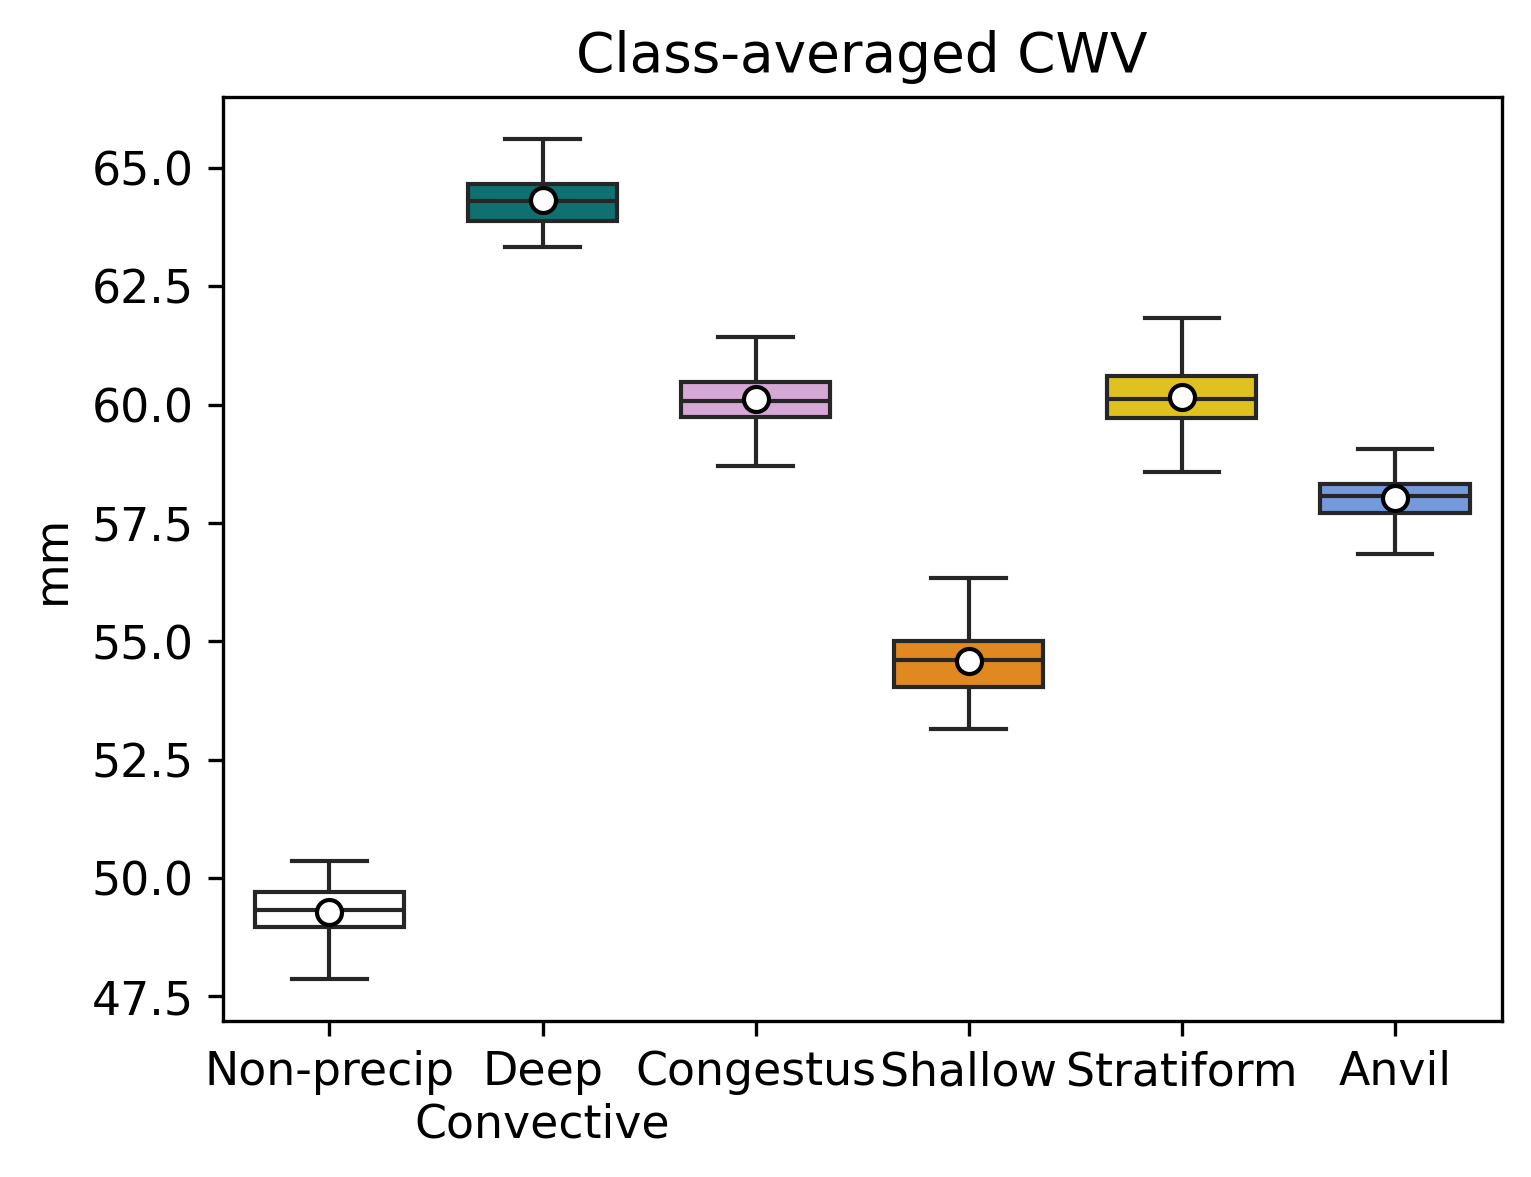

In [84]:
print("RUNNING CWV")

units = "mm"
title_tag = "CWV"
fig_tag = "cwv"
create_boxplot(np.reshape(cwv_masked[:,ktest0],(6,nmem*nt)), tests[ktest0], title_tag, fig_tag,  units)

RUNNING LWACRE


/tmp/ipykernel_38532/1785360276.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


DONE


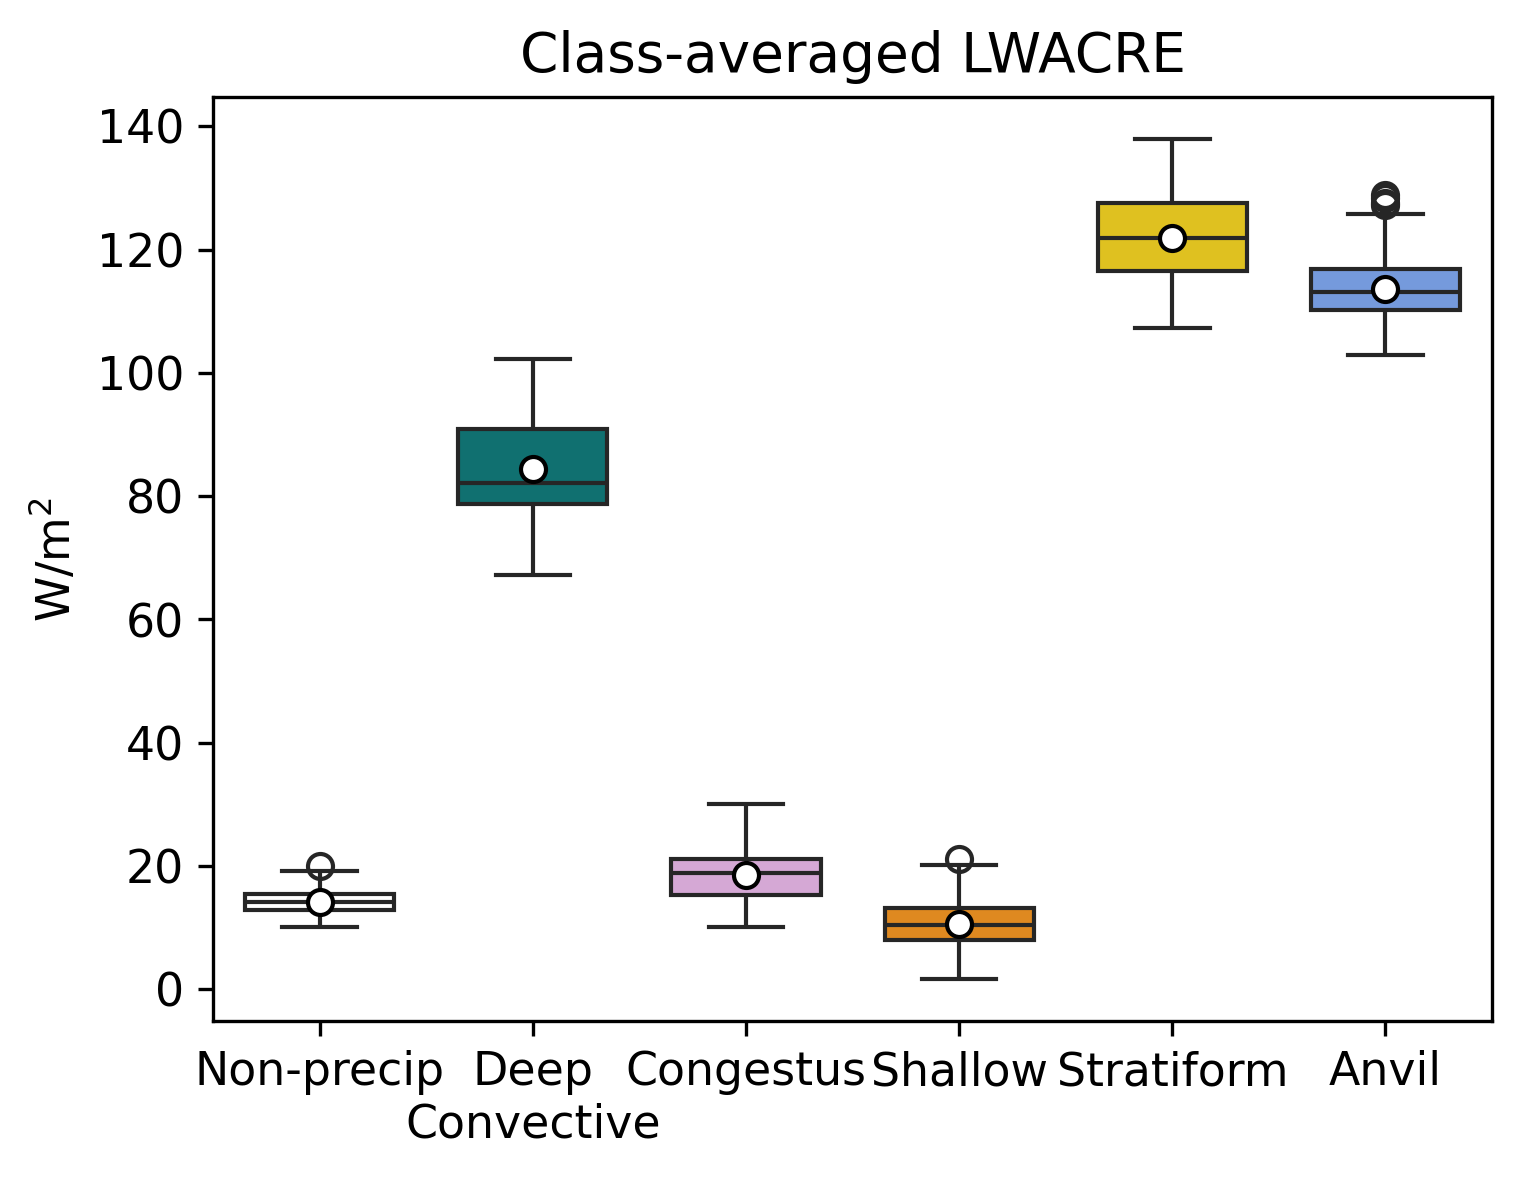

In [85]:
print("RUNNING LWACRE")

units = "W/m$^2$"
title_tag = "LWACRE"
fig_tag = "lwacre"
create_boxplot(np.reshape(lwacre_masked[:,ktest0],(6,nmem*nt)), tests[ktest0], title_tag, fig_tag, units)

print("DONE")

In [86]:
# print("RUNNING VMFup")

# units = "kg/m/s"
# title_tag = "VMFup"
# fig_tag = "vmfu"
# create_boxplot(vmfu_indexed_1hr, title_tag, fig_tag, units, yscale='log')

# print("DONE")
# print("RUNNING CONDH")

# title_tag = "CONDH"
# units = "mm/day"
# fig_tag = "condh"
# create_boxplot(condh_indexed_1hr, title_tag, fig_tag, units, yscale='log')

RUNNING QRAIN


/tmp/ipykernel_38532/2257947937.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


DONE


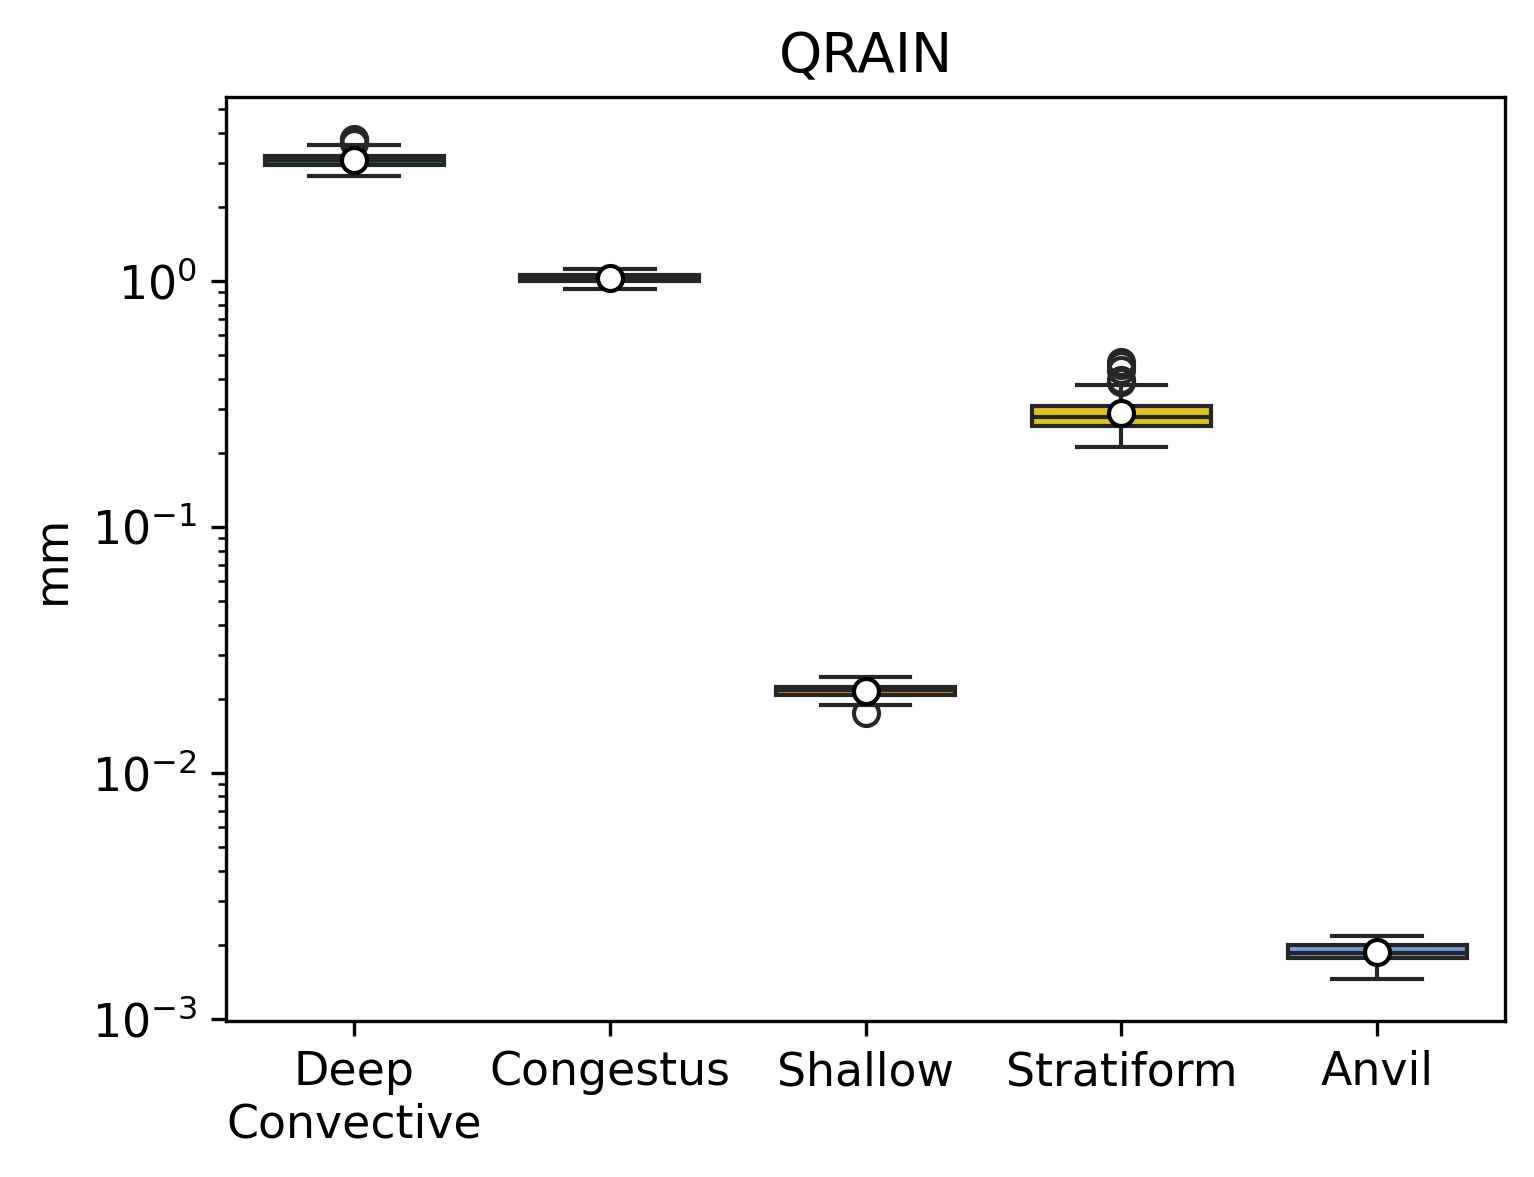

In [87]:
print("RUNNING QRAIN")

units = "mm"
title_tag = "QRAIN"
fig_tag = "qrain"
create_boxplot_noclear(np.reshape(qrain_masked[:,ktest0],(6,nmem*nt)), tests[ktest0], title_tag, fig_tag, units, yscale="log")

print("DONE")

RUNNING RAIN


/tmp/ipykernel_38532/2257947937.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


DONE


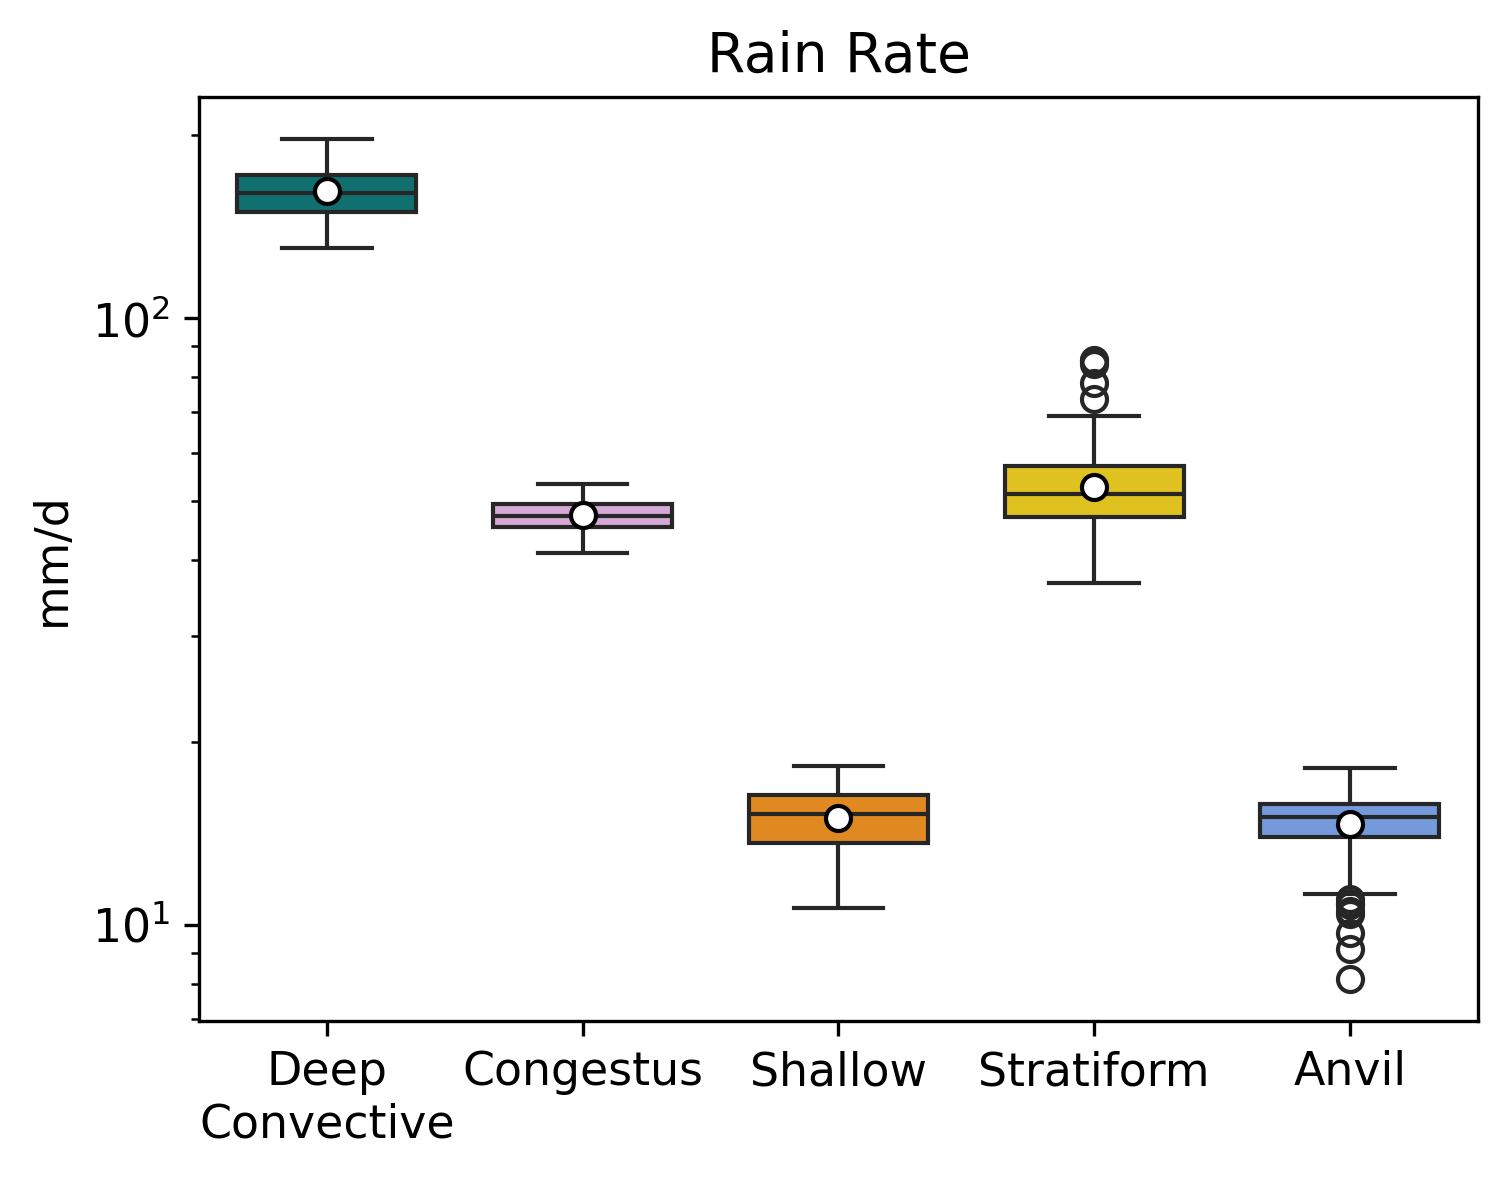

In [88]:
print("RUNNING RAIN")

units = "mm/d"
title_tag = "Rain Rate"
fig_tag = "rain"
create_boxplot_noclear(np.reshape(rain_masked[:,ktest0],(6,nmem*nt)), tests[ktest0], title_tag, fig_tag, units, yscale="log")

print("DONE")

RUNNING RAIN


/tmp/ipykernel_38532/2257947937.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


DONE


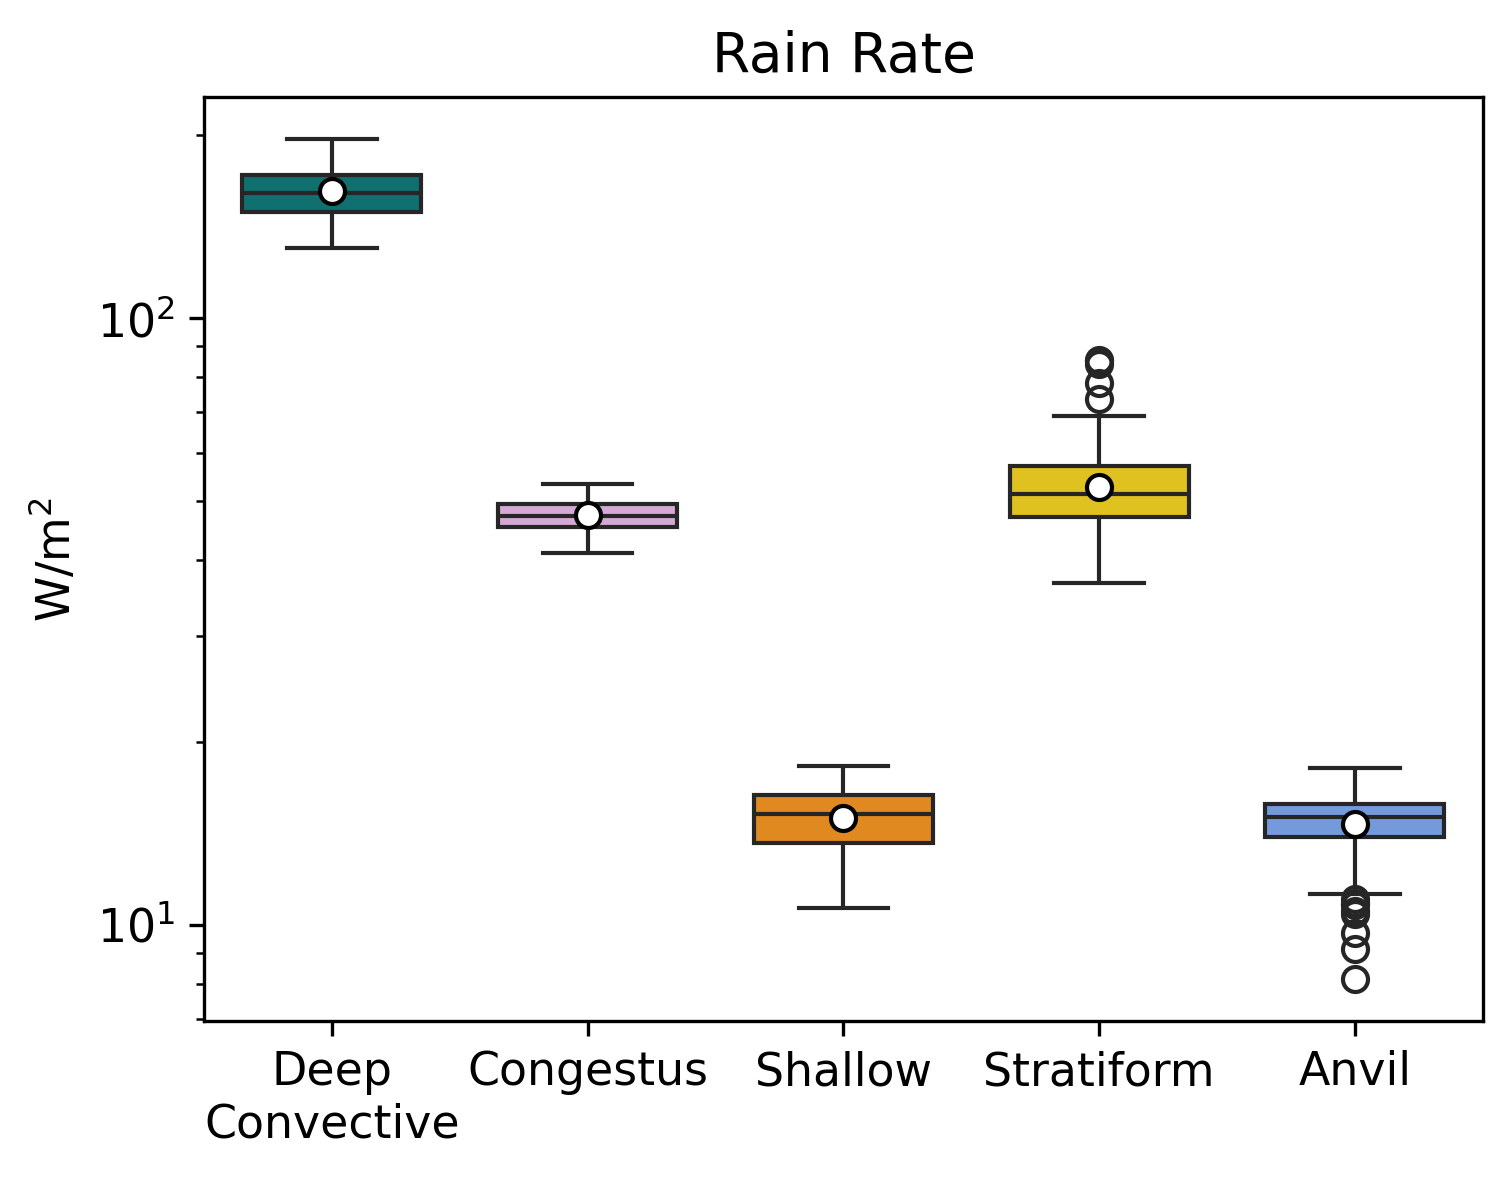

In [89]:
print("RUNNING RAIN")

lv0=2.5e6
rain_wm2 = rain_masked[:,0]*lv0/(24*3600)

# units = "mm/d"
units = "W/m$^2$"
title_tag = "Rain Rate"
fig_tag = "rain"
create_boxplot_noclear(np.reshape(rain_masked[:,ktest0],(6,nmem*nt)), tests[ktest0], title_tag, fig_tag, units, yscale="log")

print("DONE")

In [90]:
# print("RUNNING LWFB1")

# # Local LW Feedback
# units = "W/m$^2$ / mm"
# title_tag = "LWACRE/QRAIN"
# fig_tag = "lwfdb_qrain"
# create_boxplot_noclear(lwfeedb1_indexed_1hr, title_tag, fig_tag, units, yscale="log")

# print("DONE")

RUNNING LWFB1


/tmp/ipykernel_38532/2257947937.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


DONE


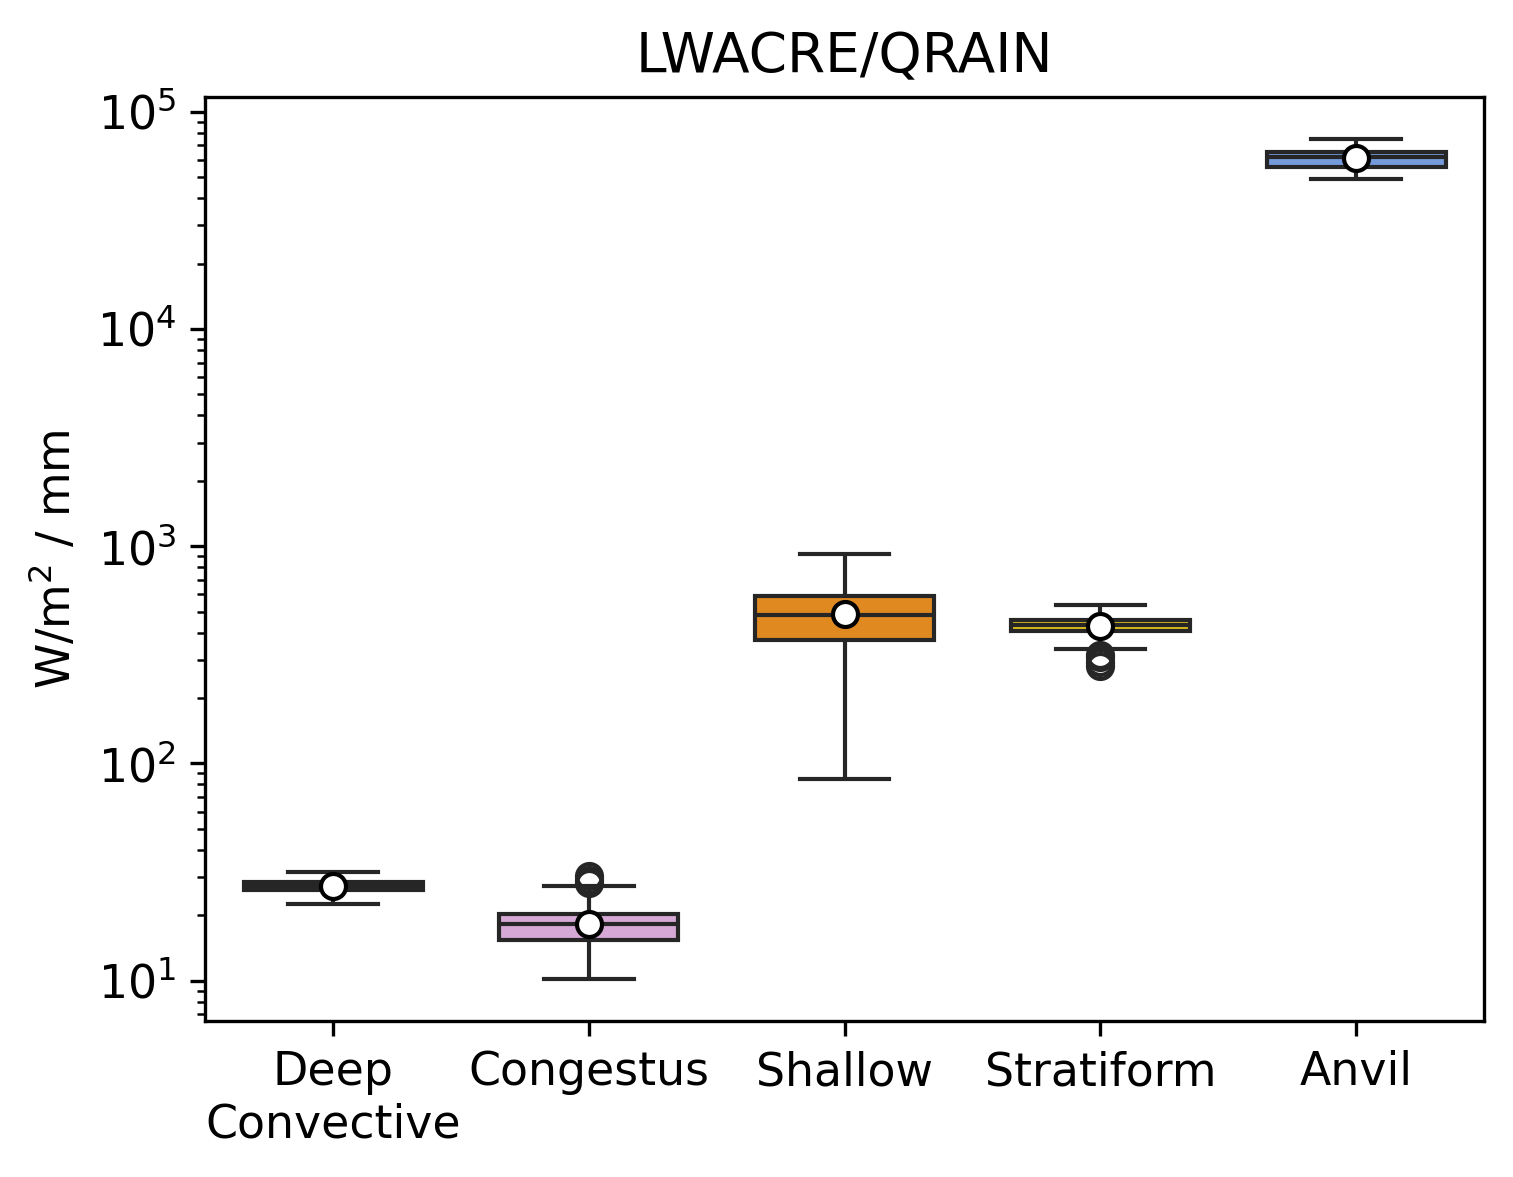

In [91]:
print("RUNNING LWFB1")

# Local LW Feedback
units = "W/m$^2$ / mm"
title_tag = "LWACRE/QRAIN"
fig_tag = "lwfdb_qrain"
create_boxplot_noclear(np.reshape(lwfeedback1[:,ktest0],(6,nmem*nt)), tests[ktest0], title_tag, fig_tag, units, yscale="log")

print("DONE")

RUNNING LWFB1


/tmp/ipykernel_38532/2257947937.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


DONE


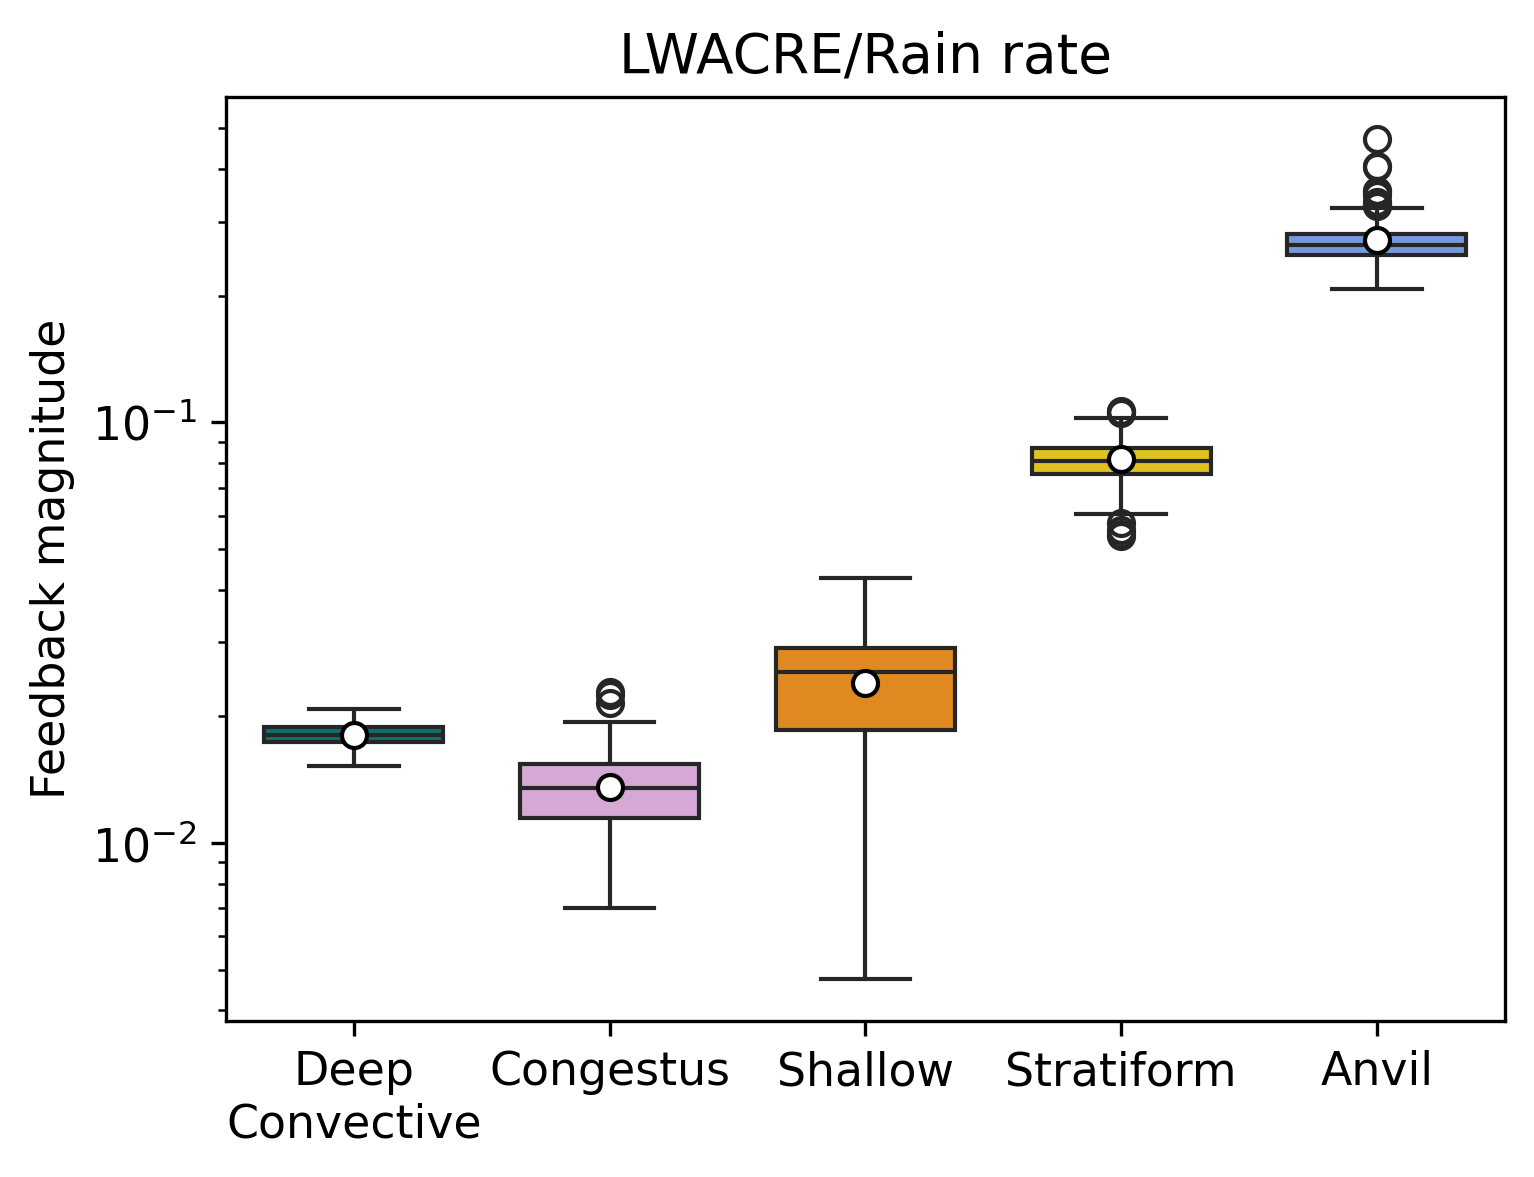

In [92]:
print("RUNNING LWFB1")

# Use W/m2 for rainfall
lv0=2.5e6
lwfeedback2 = lwacre_masked[:,ktest0] / (rain_masked[:,ktest0]*lv0/(24*3600))

# Local LW Feedback
# units = "W/m$^2$ / mm/d"
units = "Feedback magnitude"
title_tag = "LWACRE/Rain rate"
fig_tag = "lwfdb_rain"
create_boxplot_noclear(np.reshape(lwfeedback2,(6,nmem*nt)), tests[ktest0], title_tag, fig_tag, units, yscale="log")

print("DONE")

RUNNING LWFB1*AREA


/tmp/ipykernel_38532/2257947937.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


DONE


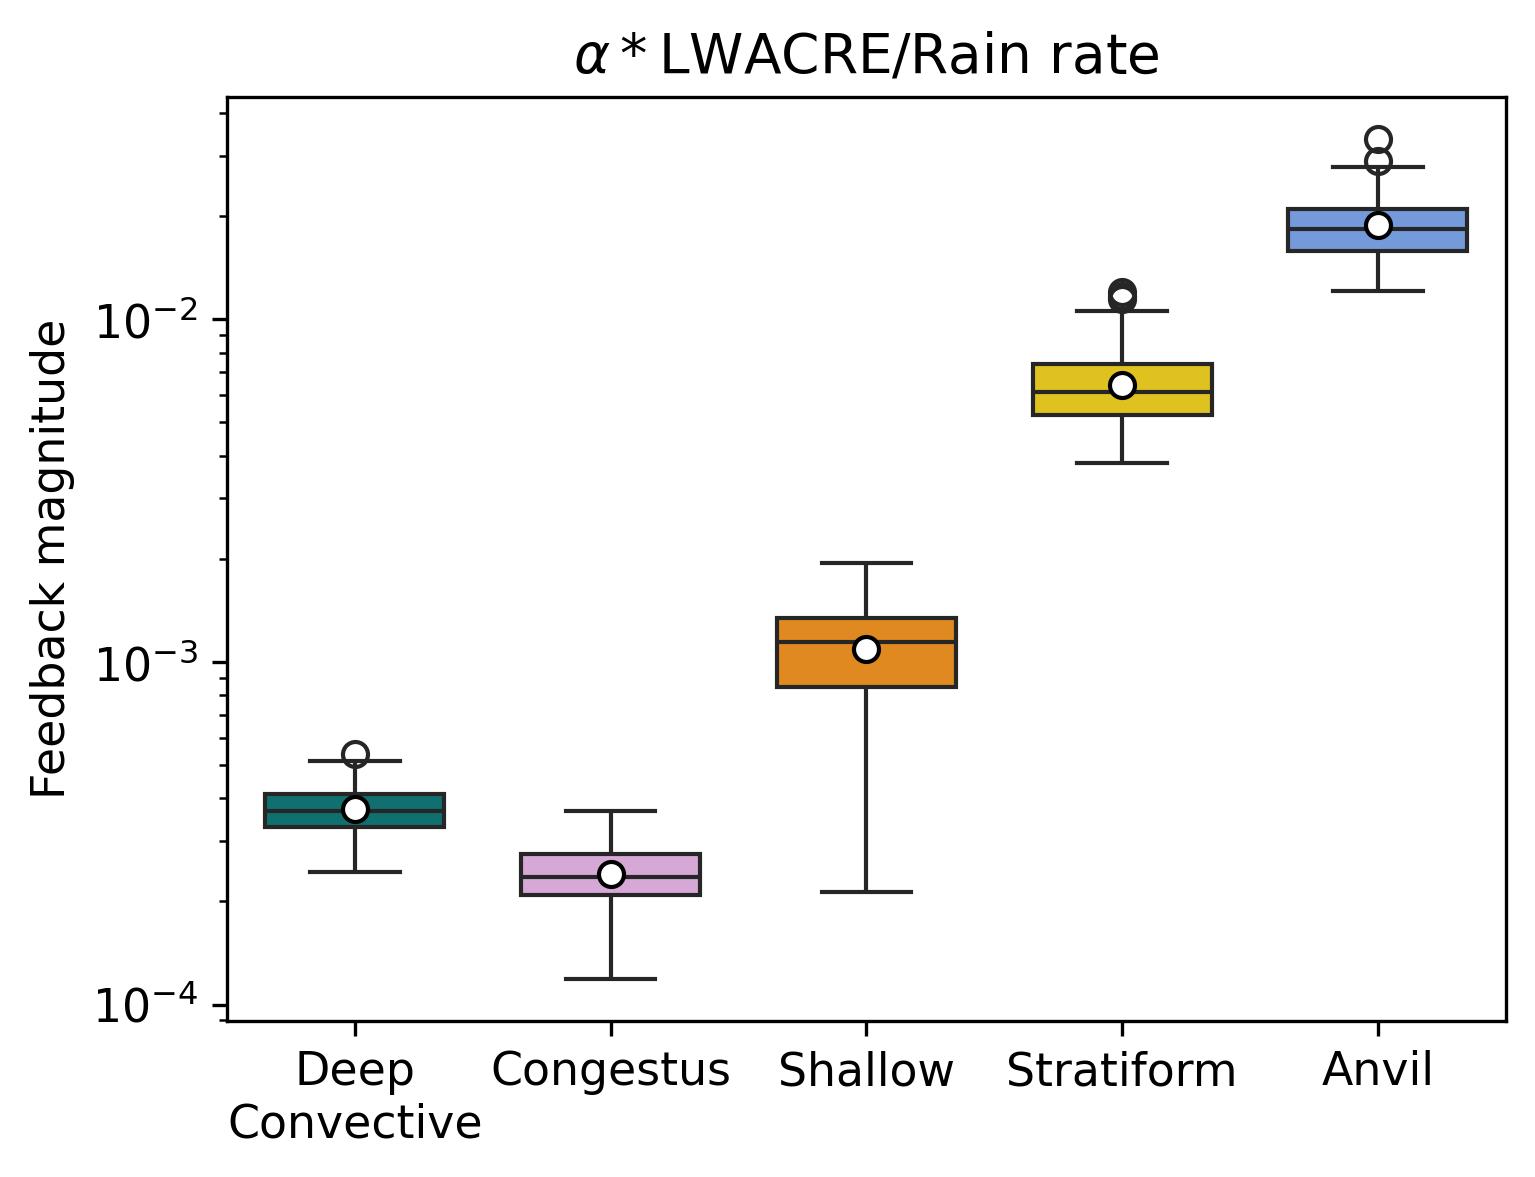

In [93]:
print("RUNNING LWFB1*AREA")

# Use W/m2 for rainfall
lv0=2.5e6
# lwfeedback2 = lwacre_masked*area_frac[:,np.newaxis,np.newaxis] / (rain_masked*lv0/(24*3600))
lwfeedback2 = lwacre_masked[:,ktest0]*area_frac[:,ktest0] / (rain_masked[:,ktest0]*lv0/(24*3600))

# Local LW Feedback
# units = "W/m$^2$ / mm/d"
units = "Feedback magnitude"
title_tag = r"$\alpha*$"+"LWACRE/Rain rate"
fig_tag = "lwfdb_rain_alpha"
create_boxplot_noclear(np.reshape(lwfeedback2,(6,nmem*nt)), tests[ktest0], title_tag, fig_tag, units, yscale="log")

print("DONE")

RUNNING LWFB1*AREA


/tmp/ipykernel_38532/2257947937.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(c_name)


DONE


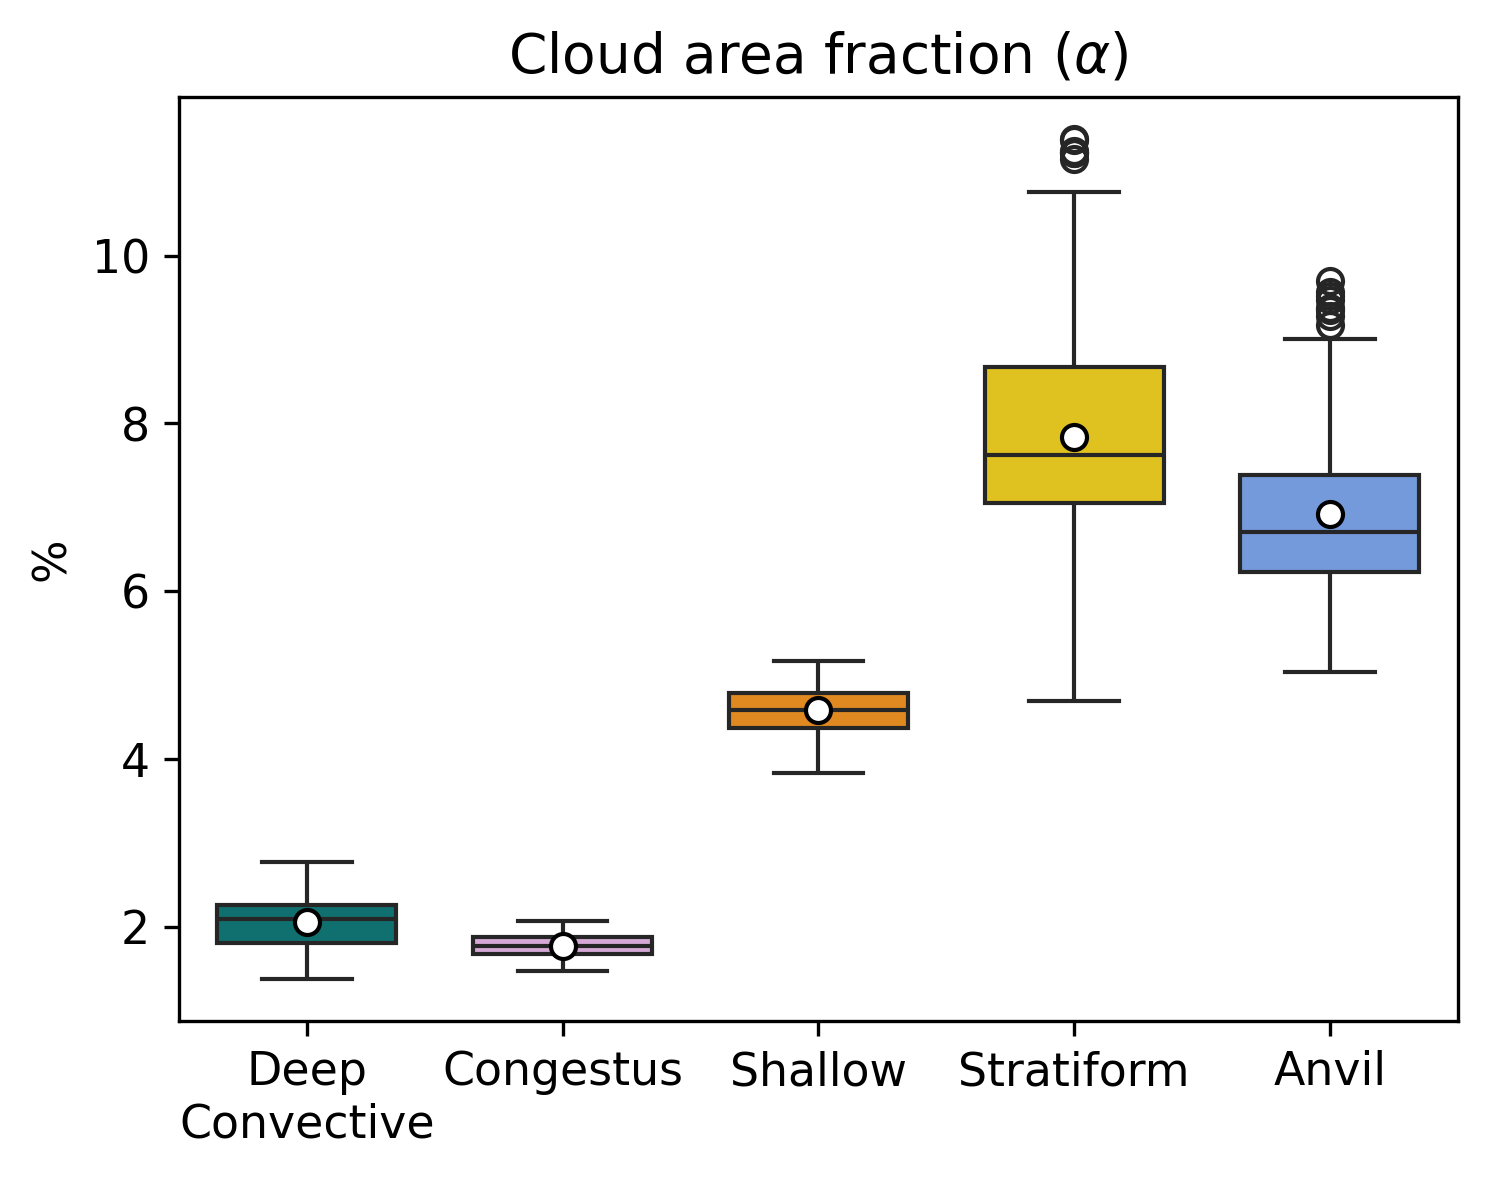

In [94]:
print("RUNNING LWFB1*AREA")

units = "%"
title_tag = r"Cloud area fraction ($\alpha$)"
fig_tag = "pclass_area"
create_boxplot_noclear(np.reshape(area_frac[:,ktest0]*1e2,(6,nmem*nt)), tests[ktest0], title_tag, fig_tag, units, yscale="linear")

print("DONE")

In [95]:
# print("RUNNING LWFB1*AREA")

# # Use W/m2 for rainfall
# lv0=2.5e6
# # lwfeedback2 = lwacre_masked*area_frac / (rain_masked*lv0/(24*3600))
# lwfeedback2 = lwacre_masked / (rain_masked*lv0/(24*3600))

# # Local LW Feedback
# # units = "W/m$^2$ / mm/d"
# units = "Feedback magnitude"
# title_tag = r"$\alpha$"+"LW-ACRE/Rain rate"
# fig_tag = "lwfdb_rain"
# # create_boxplot_noclear(np.reshape(area_frac*1e2,(6,nmem*nt)), title_tag, fig_tag, units, yscale="linear")
# create_boxplot_twovars(np.reshape(lwfeedback2,(6,nmem*nt)), np.reshape(area_frac*1e2,(6,nmem*nt)), title_tag, fig_tag, units, yscale="linear")

# print("DONE")

In [96]:
# def create_boxplot_twovars(invar, area, title_tag, fig_tag, units, yscale='linear'):

#     # c_name = ['Non-precip', 'Deep\nConvective', 'Congestus', 'Shallow\nConvective', 'Stratiform', 'Anvil']
#     # cmap = ['white', 'teal', 'plum', 'darkorange', 'gold', 'cornflowerblue']
#     c_name = ['Deep\nConvective', 'Congestus', 'Shallow\nConvective', 'Stratiform', 'Anvil']
#     cmap = ['teal', 'plum', 'darkorange', 'gold', 'cornflowerblue']
#     sns.set_palette(cmap)

#     fig = plt.figure(figsize=(5.5,4),dpi=300)
#     plt.title("Class-averaged "+title_tag)#, weight='bold')
#     # fig.set_facecolor('white')
#     ax = fig.subplots(nrows=1, ncols=1)
#     # sns.boxplot([invar[0], invar[1], invar[2], invar[3], invar[4], invar[5]],
#     sns.boxplot([invar[1], invar[2], invar[3], invar[4], invar[5]],
#                 width=0.7, showmeans=True, #log_scale=log_scale,
#                 meanprops={"marker":"o", "markerfacecolor":"white", 
#                 "markeredgecolor":"black", "markersize":"6"})

#     # ax.set_ylim([1e-2,1e14])

#     ax2 = ax.twinx()
#     ax2.set_yscale('linear')
#     ax2.set_ylim(0,50)
#     ax2.set_ylabel('%')

#     ax.set_xticklabels(c_name)
#     ax.set_ylabel(units)#, weight='bold')
#     ax.set_yscale(yscale)

#     sns.boxplot([area[1], area[2], area[3], area[4], area[5]],
#                 width=0.4, showmeans=True, #log_scale=log_scale,
#                 meanprops={"marker":"o", "markerfacecolor":"white", 
#                 "markeredgecolor":"black", "markersize":"3"})

#     plt.savefig(figdir+fig_tag+test_str+'.png',dpi=200, facecolor='white', bbox_inches='tight', pad_inches=0.2)